In [1]:
#import packages 
import pandas as pd
from io import StringIO
import matplotlib as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
from datetime import datetime
import plotly.express as px
from IPython.display import HTML, display
import missingno as msno
import plotly.graph_objects as go
from IPython.display import Image


# Anlysis of the Bee Hive Data from Schwartau

In [2]:
temp_sch = "../capstone_working/bee_hive_data/temperature_schwartau.csv"
flow_sch = "../capstone_working/bee_hive_data/flow_schwartau.csv"
weight_sch = "../capstone_working/bee_hive_data/weight_schwartau.csv"
humidity_sch = "../capstone_working/bee_hive_data/humidity_schwartau.csv"

In [3]:
temp_sch = pd.read_csv(temp_sch)
flow_sch = pd.read_csv(flow_sch)
weight_sch = pd.read_csv(weight_sch)
humidity_sch = pd.read_csv(humidity_sch)

In [4]:
def to_datetime(dataframe):
    dataframe['timestamp'] = pd.to_datetime(dataframe['timestamp'])    
    return dataframe 
def fill_missings(dataframe):
    dataframe.fillna(method='ffill', inplace=True)
    return dataframe 
def groupby_day(dataframe):
    dataframe.sort_values(by="timestamp")
    dataframe.set_index('timestamp', inplace=True) 
    dataframe = dataframe.groupby(pd.Grouper(freq='D')).mean()
    return dataframe 

## Temperature

In [5]:
temp_sch.head()

,timestamp,temperature
0,2017-01-01 14:10:00,NaN
1,2017-01-01 14:15:00,12.340
2,2017-01-01 14:20:00,12.270
3,2017-01-01 14:25:00,12.276
4,2017-01-01 14:30:00,12.356


In [6]:
missing_values_temp = pd.DataFrame(temp_sch.isnull().sum(), columns=['ID'])
missing_values_temp

,ID
timestamp,0
temperature,2032


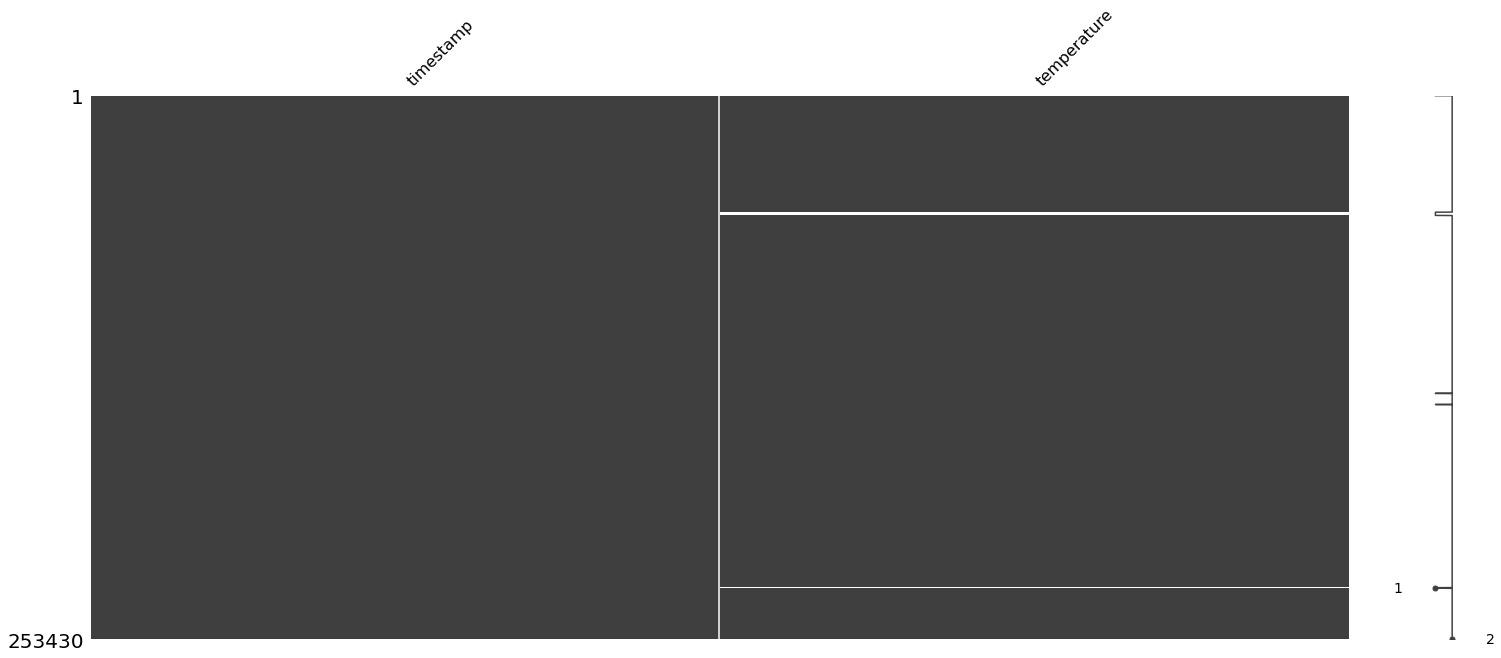

In [7]:
msno.matrix(temp_sch)

In [8]:
temp_sch = fill_missings(temp_sch)

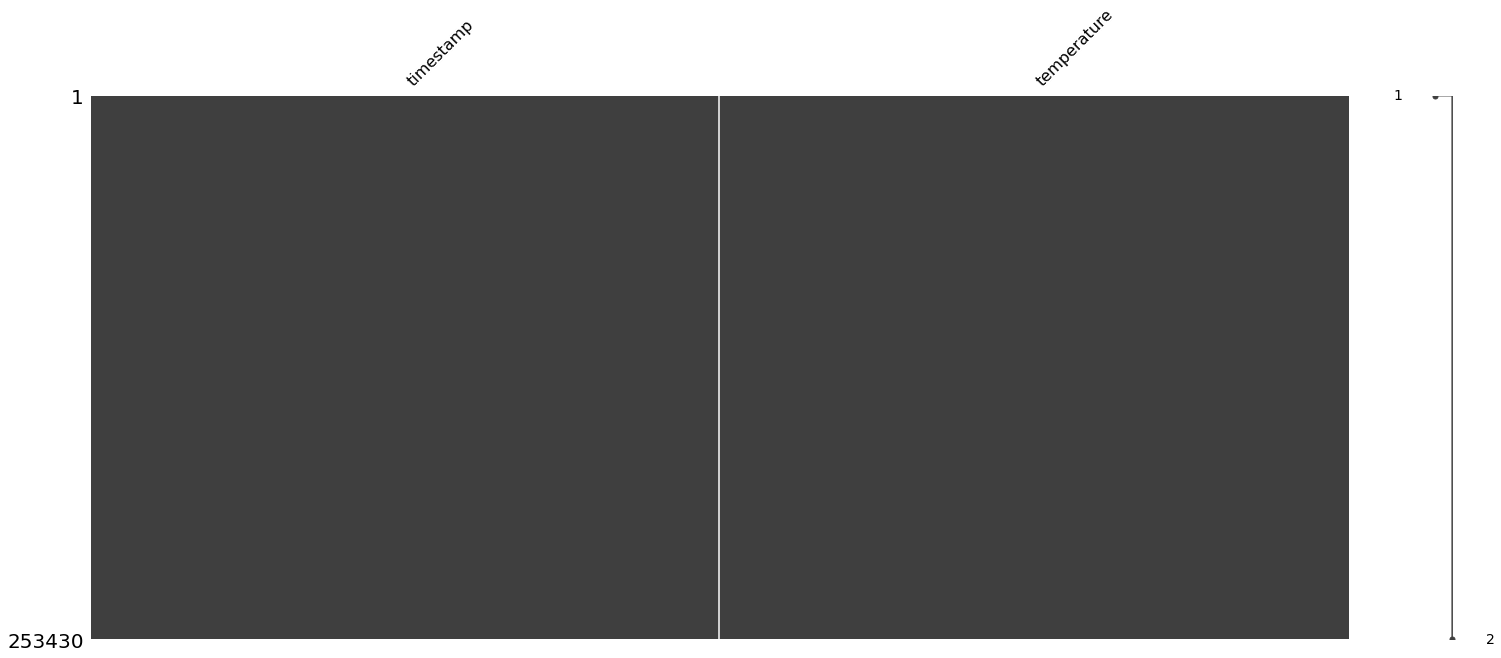

In [9]:
msno.matrix(temp_sch)

In [10]:
temp_sch.dropna(axis=0, inplace=True)

In [11]:
temp_sch = to_datetime(temp_sch)

temp_sch = groupby_day(temp_sch)

temp_sch.head()

,temperature
timestamp,
2017-01-01,15.477829
2017-01-02,13.376389
2017-01-03,16.181965
2017-01-04,14.724111
2017-01-05,9.058442


## Flow

In [12]:
flow_sch.head()

,timestamp,flow
0,2017-01-01 14:15:00,0
1,2017-01-01 14:16:00,0
2,2017-01-01 14:17:00,0
3,2017-01-01 14:18:00,0
4,2017-01-01 14:19:00,0


In [13]:
missing_values_flow = pd.DataFrame(flow_sch.isnull().sum(), columns=['ID'])
missing_values_flow

,ID
timestamp,0
flow,0


In [14]:
flow_sch = to_datetime(flow_sch)

flow_sch = groupby_day(flow_sch)

flow_sch.head()

,flow
timestamp,
2017-01-01,-0.004274
2017-01-02,-0.007639
2017-01-03,-0.010417
2017-01-04,-0.009722
2017-01-05,-0.003819


## Weight

In [15]:
weight_sch.head()

,timestamp,weight
0,2017-01-01 13:00:00,50736.790078
1,2017-01-02 01:00:00,50700.685000
2,2017-01-02 13:00:00,50614.907500
3,2017-01-03 01:00:00,50739.824167
4,2017-01-03 13:00:00,50799.746944


In [16]:
missing_values_weight = pd.DataFrame(weight_sch.isnull().sum(), columns=['ID'])
missing_values_weight

,ID
timestamp,0
weight,12


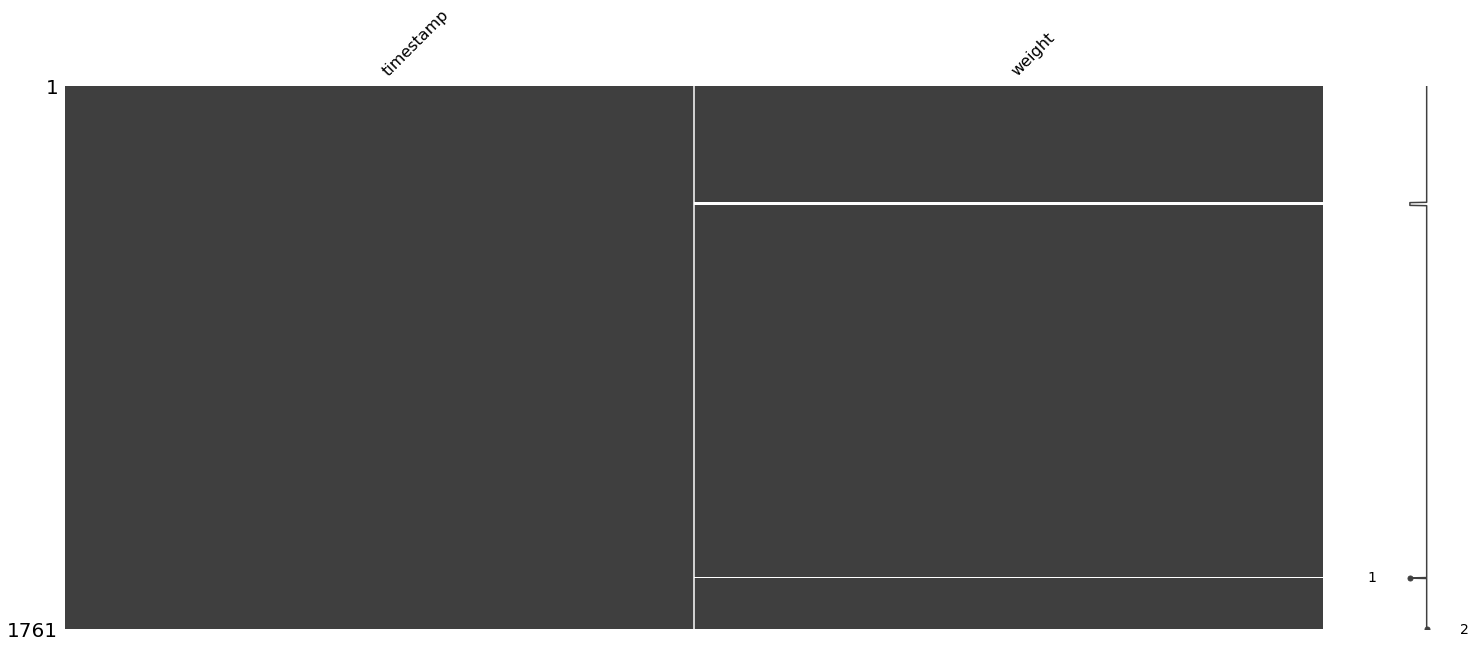

In [17]:
msno.matrix(weight_sch)

In [37]:
weight_sch = fill_missings(weight_sch)

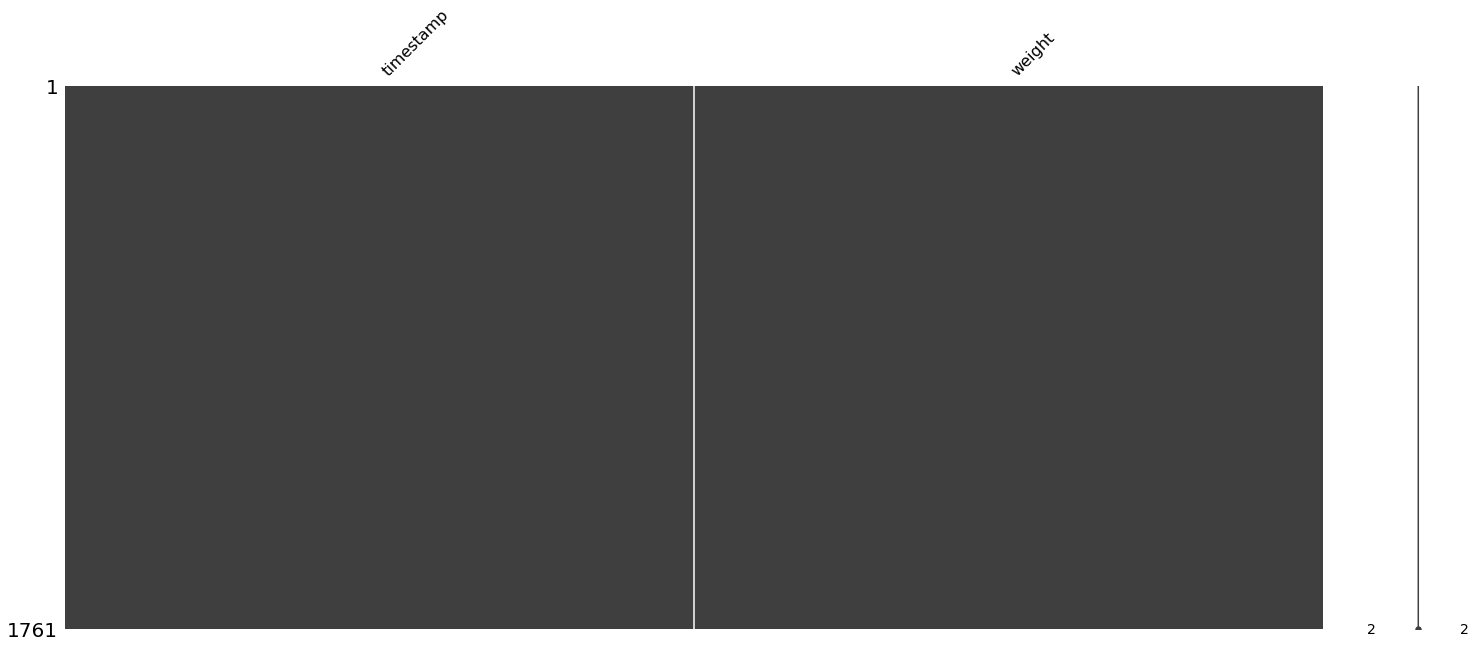

In [19]:
msno.matrix(weight_sch)

In [20]:
weight_sch = to_datetime(weight_sch)

weight_sch = groupby_day(weight_sch)

weight_sch.head()

,weight
timestamp,
2017-01-01,50736.790078
2017-01-02,50657.796250
2017-01-03,50769.785556
2017-01-04,50532.602778
2017-01-05,50109.808194


## Humidity

In [21]:
humidity_sch.head()

,timestamp,humidity
0,2017-01-01 13:00:00,98.040310
1,2017-01-02 01:00:00,98.610556
2,2017-01-02 13:00:00,99.002083
3,2017-01-03 01:00:00,98.486806
4,2017-01-03 13:00:00,98.320139


In [22]:
missing_values_humidity = pd.DataFrame(humidity_sch.isnull().sum(), columns=['ID'])
missing_values_humidity

,ID
timestamp,0
humidity,12


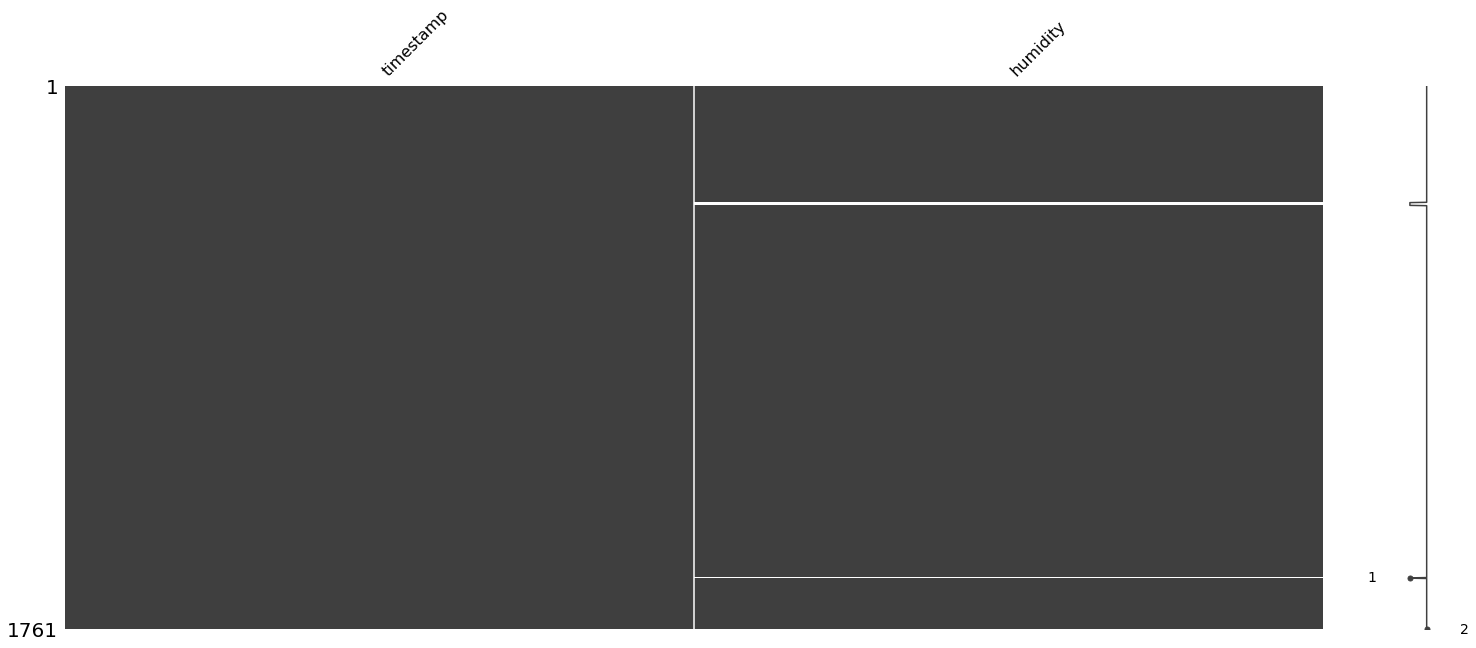

In [23]:
msno.matrix(humidity_sch)

In [24]:
humidity_sch.describe()

,humidity
count,1749.000000
mean,83.987777
std,26.501904
min,-100.000000
25%,79.326167
50%,91.066806
75%,96.611806
max,100.000000


In [26]:
humidity_sch.drop(humidity_sch[humidity_sch['humidity'] < 0].index, inplace=True)

In [38]:
humidity_sch = fill_missings(humidity_sch)

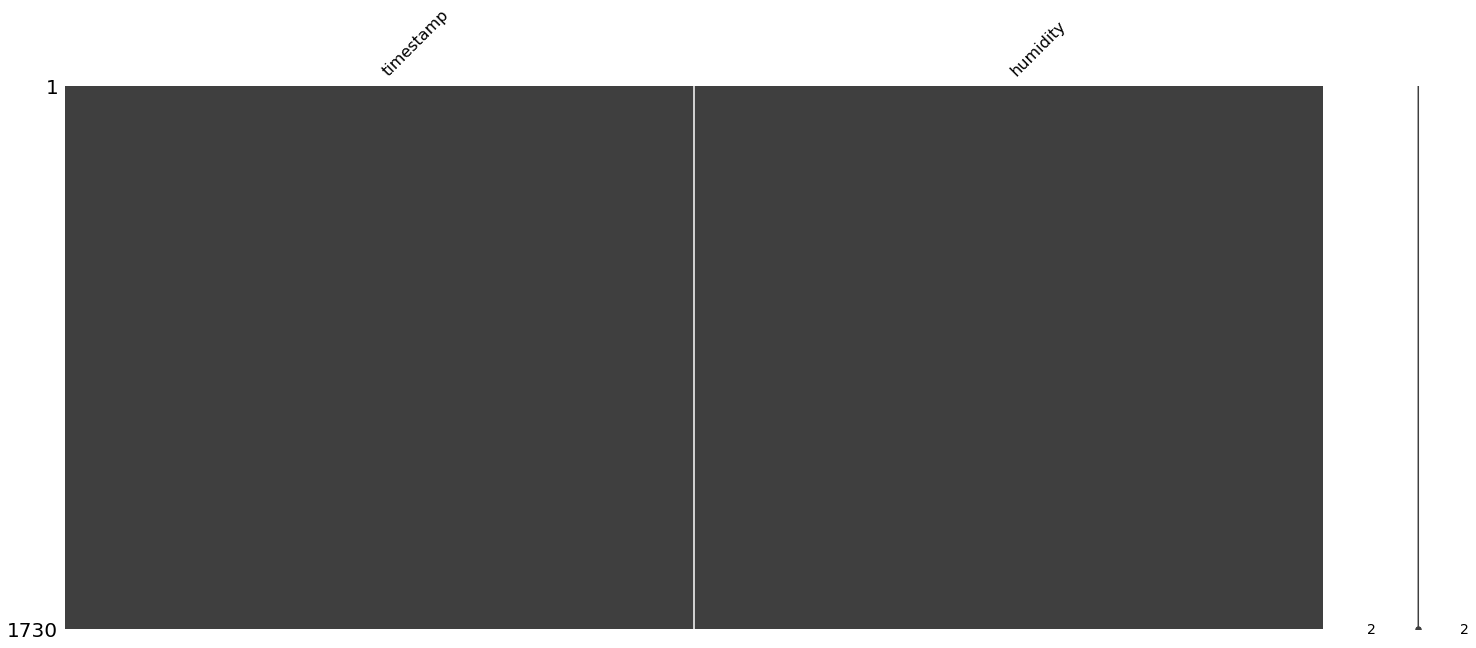

In [28]:
msno.matrix(humidity_sch)

In [29]:
humidity_sch = to_datetime(humidity_sch)

humidity_sch = groupby_day(humidity_sch)

humidity_sch.head()

,humidity
timestamp,
2017-01-01,98.040310
2017-01-02,98.806319
2017-01-03,98.403472
2017-01-04,97.292292
2017-01-05,96.583889


In [30]:
bee_hive_sch = temp_sch.join([flow_sch, humidity_sch, weight_sch])

In [31]:
bee_hive_sch.reset_index(level=0, inplace=True)
bee_hive_sch.head()

,timestamp,temperature,flow,humidity,weight
0,2017-01-01,15.477829,-0.004274,98.040310,50736.790078
1,2017-01-02,13.376389,-0.007639,98.806319,50657.796250
2,2017-01-03,16.181965,-0.010417,98.403472,50769.785556
3,2017-01-04,14.724111,-0.009722,97.292292,50532.602778
4,2017-01-05,9.058442,-0.003819,96.583889,50109.808194


# Data Visualisation

## Temperature
The optimal Temperature of a Bee Hive is between 30 °C and 35 °C.

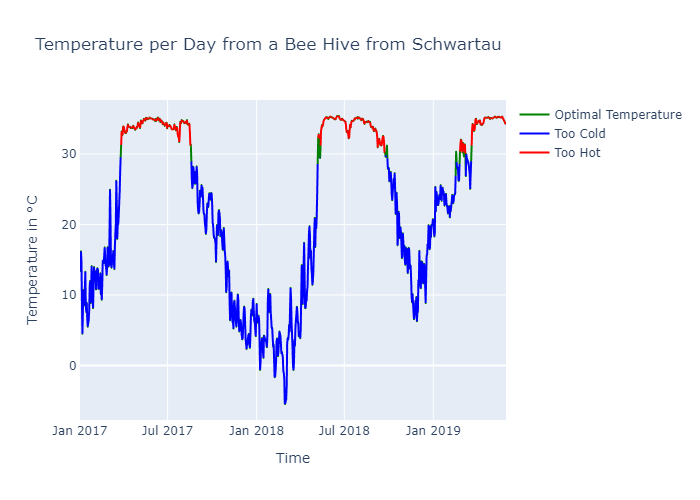

In [43]:
fig = go.Figure()
# Full line
fig.add_scattergl(x=bee_hive_sch.timestamp, y=bee_hive_sch.temperature, line={'color': 'green'}, name='Optimal Temperature')

# Above threshhgold
fig.add_scattergl(x=bee_hive_sch.timestamp, y=bee_hive_sch.temperature.where(bee_hive_sch.temperature <=30), line={'color': 'blue'}, name='Too Cold')
fig.add_scattergl(x=bee_hive_sch.timestamp, y=bee_hive_sch.temperature.where(bee_hive_sch.temperature >=30), line={'color': 'red'}, name='Too Hot')
fig.update_layout(title='Temperature per Day from a Bee Hive from Schwartau',
                   xaxis_title='Time',
                   yaxis_title='Temperature in °C')
#fig.show()
fig.write_image("plots/fig_hive.png")
Image("plots/fig_hive.png")

## Humidity
The optimal Humidity of a Bee Hive is between 50% and 60%.

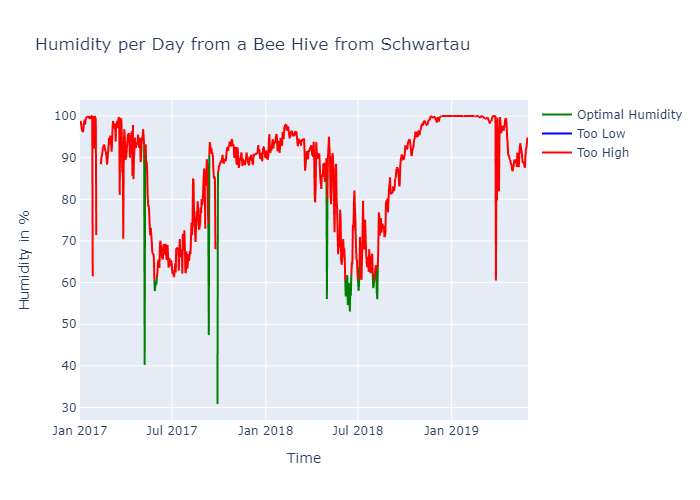

In [41]:
fig1 = go.Figure()
# Full line
fig1.add_scattergl(x=bee_hive_sch.timestamp, y=bee_hive_sch.humidity, line={'color': 'green'}, name='Optimal Humidity')

# Above threshhgold
fig1.add_scattergl(x=bee_hive_sch.timestamp, y=bee_hive_sch.humidity.where(bee_hive_sch.humidity <=50), line={'color': 'blue'}, name='Too Low')
fig1.add_scattergl(x=bee_hive_sch.timestamp, y=bee_hive_sch.humidity.where(bee_hive_sch.humidity >=60), line={'color': 'red'}, name='Too High')
fig1.update_layout(title='Humidity per Day from a Bee Hive from Schwartau',
                   xaxis_title='Time',
                   yaxis_title='Humidity in %')
#fig1.show()
fig1.write_image("plots/fig_hive1.png")
Image("plots/fig_hive1.png")

## Weight

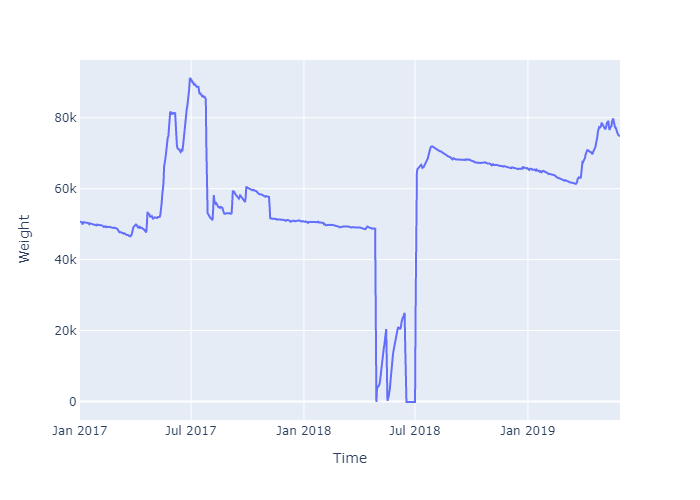

In [34]:
fig2 = px.line(bee_hive_sch, x="timestamp", y="weight", hover_data=['weight'],
             labels={'weight':'Weight', 'timestamp': 'Time'})
#fig2.show()
fig2.write_image("plots/fig_hive2.png")
Image("plots/fig_hive2.png")

## Flow
The Inflow(green) and the Outflow(red) from Bees into the Bee Hive.

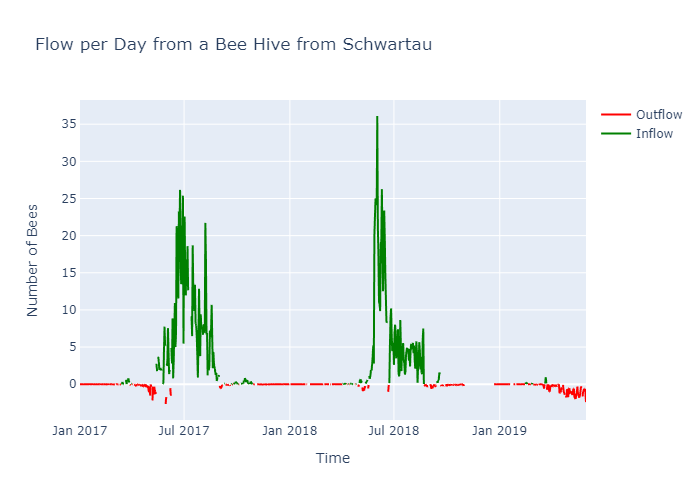

In [44]:
fig3 = go.Figure()
# Full line
#fig1.add_scattergl(x=bee_hive_sch.timestamp, y=bee_hive_sch.humidity, line={'color': 'green'}, name='Optimal Humidity')

# Above threshhgold
fig3.add_scattergl(x=bee_hive_sch.timestamp, y=bee_hive_sch.flow.where(bee_hive_sch.flow <0), line={'color': 'red'}, name='Outflow')
fig3.add_scattergl(x=bee_hive_sch.timestamp, y=bee_hive_sch.flow.where(bee_hive_sch.flow >0), line={'color': 'green'}, name='Inflow')
fig3.update_layout(title='Flow per Day from a Bee Hive from Schwartau',
                   xaxis_title='Time',N
                   yaxis_title='Number of Bees')
#fig1.show()
fig3.write_image("plots/fig_hive3.png")
Image("plots/fig_hive3.png")